<a href="https://colab.research.google.com/github/almostoutlier/Projects/blob/main/Rocks_vs_Mines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/data/sonar.all-data.csv'
sonar_dataset = pd.read_csv(path, header = None)

In [ ]:
sonar_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
dict_MR = {'M': 1, 'R':0}
sonar_dataset[61] = sonar_dataset[60].map(dict_MR)

In [ ]:
sonar_dataset.head()
sonar_dataset[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [ ]:
sonar_dataset[61].value_counts()

1    111
0     97
Name: 61, dtype: int64

In [ ]:
X = sonar_dataset.drop(columns = 61, axis = 1)
X = X.drop(columns = 60, axis = 1)
Y = sonar_dataset[61]
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

<ipython-input-24-491000f5bc9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sonar_dataset.corr()


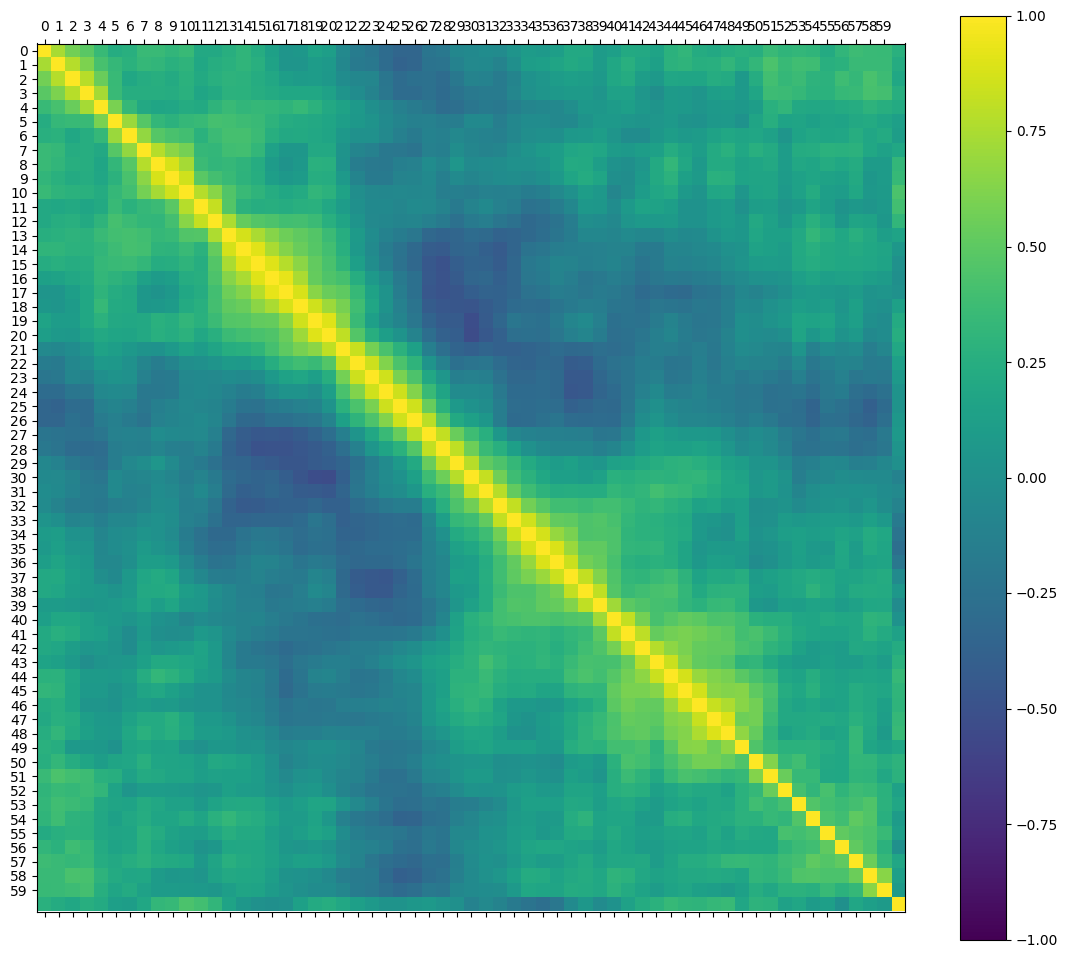

In [ ]:
correlations = sonar_dataset.corr()

# Plot correlation matrix
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 60, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Mine', 'Rock'], yticklabels=['Mine', 'Rock'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 1)

In [ ]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (208, 60)
Train data:  (176, 60)
Test data:  (32, 60)


In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
r_squared = lg.score(X_train, Y_train)
print(r_squared)

0.8181818181818182


              precision    recall  f1-score   support

           0       0.84      0.76      0.79        82
           1       0.80      0.87      0.84        94

    accuracy                           0.82       176
   macro avg       0.82      0.81      0.82       176
weighted avg       0.82      0.82      0.82       176



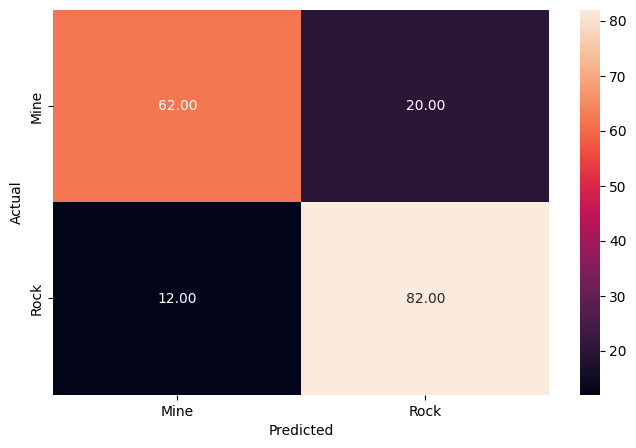

In [ ]:
y_train_pred = lg.predict(X_train)
train_accuracy = accuracy_score(y_train_pred, Y_train)
metrics_score(Y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.76      0.87        17

    accuracy                           0.88        32
   macro avg       0.89      0.88      0.87        32
weighted avg       0.90      0.88      0.87        32



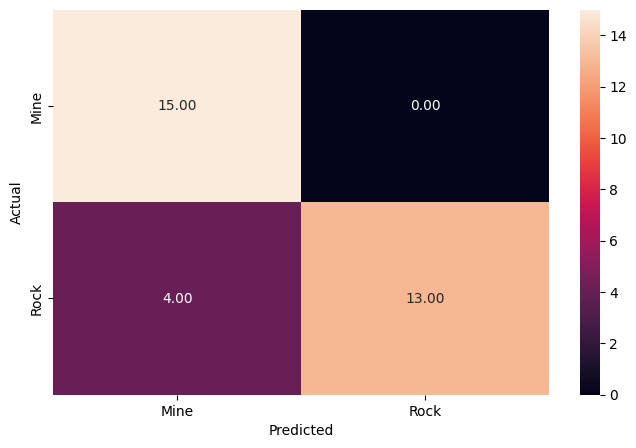

In [ ]:
y_test_pred = lg.predict(X_test)
test_accuracy = accuracy_score(y_test_pred, Y_test)
metrics_score(Y_test, y_test_pred)

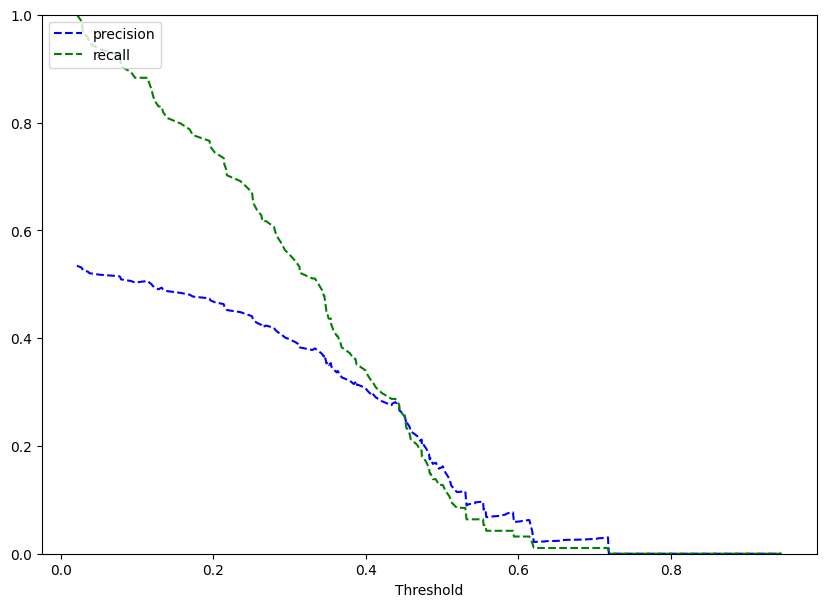

In [ ]:
y_scores_lg=lg.predict_proba(X_train)


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(Y_train, y_scores_lg[: , 0])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

Threshold is 0.5

              precision    recall  f1-score   support

           0       0.84      0.76      0.79        82
           1       0.80      0.87      0.84        94

    accuracy                           0.82       176
   macro avg       0.82      0.81      0.82       176
weighted avg       0.82      0.82      0.82       176



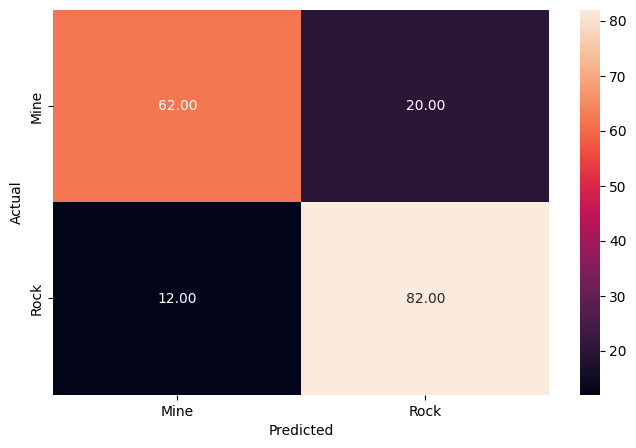

In [ ]:
optimal_threshold=.5
y_pred_train = lg.predict_proba(X_train)
metrics_score(Y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.76      0.87        17

    accuracy                           0.88        32
   macro avg       0.89      0.88      0.87        32
weighted avg       0.90      0.88      0.87        32



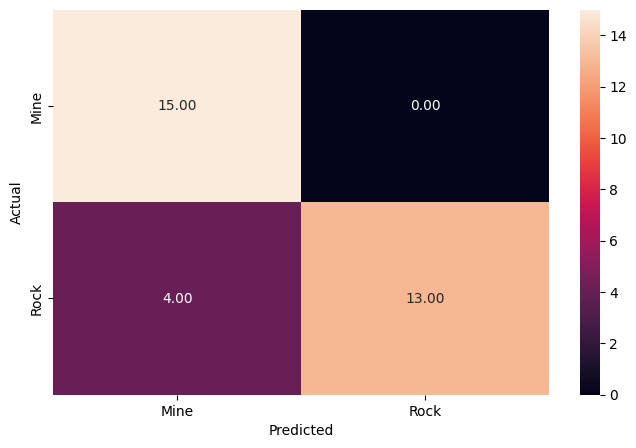

In [ ]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(Y_test, y_pred_test[:,1]>optimal_threshold)